# TP PERCEPTRON

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from scipy import pi
#from random import randint
import requests
import random

## chargement donnees ici la classe -1 represente les democrates et 1 les repiblicain

In [87]:

donnee = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
donnee = donnee.text.replace('\n',',')

donnee = donnee.replace('democrat','-1')
donnee = donnee.replace('republican','1')
donnee = donnee.replace('y','1')
donnee = donnee.replace('n','-1')
donnee = donnee.replace('?','0')
donnee = donnee.split(',')
donnee.pop()
donnee = np.asarray(donnee)
donnee = [int(x) for x in donnee]
donnee = np.reshape(donnee,(-1,17))
np.random.seed(987654321)
np.random.shuffle(donnee)
print(donnee)

[[ 1 -1  0 ...,  1 -1 -1]
 [-1  1 -1 ..., -1 -1  1]
 [ 1 -1  1 ...,  1 -1 -1]
 ..., 
 [-1  1 -1 ...,  1  1  0]
 [ 1 -1  1 ...,  1  0 -1]
 [-1  1 -1 ..., -1  1  0]]


### Melange et division des données


In [88]:

testData=donnee[-101:-1,:]
trainData=donnee[0:-101,:]

   ### Inversion des valeurs pour la classe -1

#### def inversionClassNegative(data):
    newData = []
    tmpData = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    for i in range(len(data)):    
        
        if data[i,0]==-1:
            
            tmpData[0] = data[i,0]          
            for x in range(1,len(data[i,:])):
                tmpData[x] = ((data[i,x])*(-1))
            print("==============================newData")
            print(newData)
            newData.append(tmpData)
        else:
            newData.append(data[i,:])
    
    newData = np.asarray(newData)  
    newData = np.reshape(newData,(-1,17))
    
    print("==============================newData")
    print(newData)
    
    return newData
   

In [89]:
def inv2(data):
    newData=[]
    tmpData = np.array(data)
    for i in range(len(tmpData)):
        if tmpData[i,0]==-1:
            tmpData[i,0]=1
            newData.append(tmpData[i,:]*-1)
                            
        else:
            newData.append(tmpData[i,:])
    newData = np.asarray(newData)
    newData = np.reshape(newData,(-1,17))
    
    return newData

### Tri des classe -1 et 1

In [90]:
def divisionClass(data):
    classPositive=[]
    classNegative=[]
    for i in range(len(data)):
        if(data[i,0]==-1):
            classNegative.append(data[i,:])
        else:
            classPositive.append(data[i,:])
    return (classPositive,classNegative)

### classifie un vecteur de donnees avec un vecteur de poids

In [91]:
def classify(data, vectorWeight):
    #res=[]
    #for i in range(len(data)):
    #    res.append(data[i]*vectorWeight[i])
    #return np.sum(np.asarray(res))
    return ((data*vectorWeight).sum())

In [92]:
def changeWeight(data, vectorWeight):
    newWeight=[]
    for i in range(len(data)):
        newWeight.append(data[i]+vectorWeight[i])
    return newWeight

In [93]:
def trainIteration(nbIterMax,weight,data):
    tabRes=[]
    tabErrorRate=[]
    for i in range(nbIterMax):
        tabRes=[]
        for x in range(len(data)):
            res=classify(data[x,:],weight)       
            tabRes.append(res)
            if res<0:
                weight=changeWeight(data[x,:],weight)
        errorRate=calculateErrorRate(tabRes)
        tabErrorRate.append(errorRate)
        
    return tabErrorRate,weight
                

In [94]:
def calculateErrorRate(tabResult):
    cptError=0
    for i in range(len(tabResult)):
        if(tabResult[i]<0):
            cptError=cptError+1
    return cptError/len(tabResult)*100

In [104]:
def trainErrorRate(maxErrorRate, weight,data):
    tabRes=[]
    tabErrorRate=[]
    errorRate=100
    i =0
    while errorRate>maxErrorRate:
        tabRes=[]
        for x in range(len(data)):
            res=classify(data[x,:],weight)
            tabRes.append(res)
            if res<0:
                weight=changeWeight(data[x,:],weight)
        errorRate=calculateErrorRate(tabRes)
        tabErrorRate.append(errorRate)
        i = i+1
    return tabErrorRate,weight

In [96]:
def printErrorRate(tabError):
    plt.plot(tabError)
    plt.show()

In [97]:
def triPosNeg(data):
    
    
    
    newData = inv2(data)

    
    
    classPositive,classNegative = divisionClass(newData)
    
    len1 = len(classPositive)
    len2 = len(classNegative)
    dataBis = []
    if (len1 < len2):
        for i in range(len1):
            dataBis.append(classPositive[i])
            dataBis.append(classNegative[i])
        for j in range(len1,len2):
            dataBis.append(classNegative[j])
    else:
        for i in range(len2):
            dataBis.append(classPositive[i])
            dataBis.append(classNegative[i])
        for j in range(len2,len1):
            dataBis.append(classPositive[j])
    
    dataBis = np.reshape(dataBis,(-1,17))
    
    return(dataBis) 

In [98]:
def classTest(data,weight):
    tabRes = []
    for x in range(len(data)):
        res=classify(data[x,:],weight)
        tabRes.append(res)
    
    errorRate=calculateErrorRate(tabRes)
   
    
    return errorRate

### Calcul du pourcentage d'erreur sur corpus apprentissage


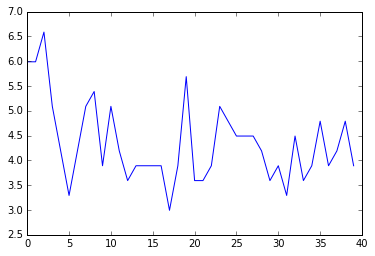

[-9, 1, -11, -9, 22, 6, -3, 6, 7, -1, 6, -8, 4, 0, -4, -4, 1]


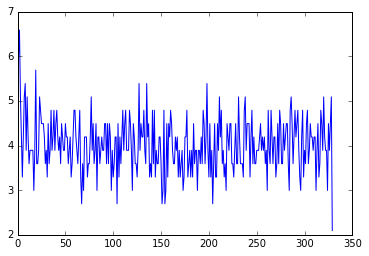

[-10, 0, -18, -11, 29, 9, -4, 7, 6, 0, 3, -9, 5, -2, -2, -5, 0]


In [107]:


dataBis = triPosNeg(trainData)


weightInit = [1,0,1,0,1,1,1,0,0,0,0,1,0,1,1,1,1]

error1,weight1 = trainIteration(40,weightInit,dataBis)
printErrorRate(error1)
print(weight1)

error2,weight2 = trainErrorRate(2.5,weightInit,dataBis)
printErrorRate(error2)
print(weight2)



### Corpus de test

In [108]:
data = inv2(testData)

error1 = classTest(data,weight1)
print(error1)
error2 = classTest(data,weight2)
print(error2)


4.0
6.0
